<a href="https://colab.research.google.com/github/leenu10/prediction-of-delayed-deliveries-using-logistics-data/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVE**:

> Identifying the parameters influencing the on-time delivery and predicting whether
there will be delay or not, based on these parameters is the main objective of this
study. 



**Installing Pandas Profiling**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 25.9 MB 10.0 MB/s 
     |████████████████████████████████| 10.9 MB 8.2 MB/s 
     |████████████████████████████████| 596 kB 39.1 MB/s 
     |████████████████████████████████| 102 kB 9.0 MB/s 
     |████████████████████████████████| 675 kB 32.8 MB/s 
     |████████████████████████████████| 4.7 MB 47.3 MB/s 
     |████████████████████████████████| 63 kB 633 kB/s 
     |████████████████████████████████| 812 kB 15.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=a3ef6bd699f21736ed5244a665f783cbab254597d6762b987262745207587ac1
  Stored in directory: /tmp/pip-ephem-wheel-cache-edk1mhwz/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=130249dd7eeed5ceeb79392bc09e5ef8e0f6701052237cdd5b1e1479ccefdda3
  Stored in directory: /ro

**Importing Necessary Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from geopy import distance # For filling the missing values of Transportation distance
                           # using origin and destination coordinates and also for calculating the 
                           #distance remaining using the current location and destination coordinates.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
# Importing modules for evaluating the performance of the model.
from sklearn.metrics import r2_score,classification_report,confusion_matrix,accuracy_score,precision_score, recall_score,f1_score
# Importing module for fine tuning of hyper parameters.
from sklearn.model_selection import RandomizedSearchCV                                 
%matplotlib inline

**Reading The Dataet**

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Delivery truck trip data.xlsx')

In [ ]:
data.head(5)

GpsProvider           BookingID Market/Regular           BookingID_Date  \
0  CONSENT TRACK  MVCV0000927/082021          Market 2020-08-17 14:59:01.000   
1        VAMOSYS  VCV00014271/082021         Regular 2020-08-27 16:22:22.827   
2  CONSENT TRACK  VCV00014382/082021         Regular 2020-08-27 17:59:24.987   
3        VAMOSYS  VCV00014743/082021         Regular 2020-08-28 00:48:24.503   
4        VAMOSYS  VCV00014744/082021         Regular 2020-08-28 01:23:19.243   

   vehicle_no                                    Origin_Location  \
0    KA590408               TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU   
1  TN30BC5917  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
2  TN22AR2748              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   
3  TN28AQ0781  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
4   TN68F1722              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   

                                Destination_Location      Org_lat_lon  \
0       ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA  13.1550,80.1960   
1  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  12.8390,79.9540   
2              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY  11.8710,79.7390   
3  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  12.8390,79.9540   
4              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY  11.8720,79.6320   

       Des_lat_lon      Data_Ping_time  ... TRANSPORTATION_DISTANCE_IN_KM  \
0  12.7400,77.8200 2020-08-24 00:05:09  ...                         320.0   
1  12.8390,79.9540 2020-08-28 12:40:28  ...                         103.0   
2  11.8710,79.7390 2020-08-28 09:05:09  ...                         300.0   
3  12.8390,79.9540 2020-08-28 12:40:31  ...                          61.0   
4  11.8720,79.6320 2020-08-28 12:40:29  ...                         240.0   

  vehicleType Minimum_kms_to_be_covered_in_a_day Driver_Name  Driver_MobileNo  \
0         NaN                                NaN         NaN              NaN   
1         NaN                                NaN      RAMESH              NaN   
2         NaN                                NaN        GIRI              NaN   
3         NaN                                NaN        RAVI              NaN   
4         NaN                                NaN       TAMIL              NaN   

   customerID                          customerNameCode  supplierID  \
0  ALLEXCHE45                     Ashok leyland limited  VIJEXHOSR7   
1  DMREXCHEUX  Daimler india commercial vehicles pvt lt  VJLEXSHE09   
2  LUTGCCHE06                             Lucas tvs ltd  GSTEXLAK1Q   
3  DMREXCHEUX  Daimler india commercial vehicles pvt lt  ARVEXNAM09   
4  LUTGCCHE06                             Lucas tvs ltd  SRTEXKOR96   

    supplierNameCode          Material Shipped  
0    VIJAY TRANSPORT     BRACKET / GRAB HANDLE  
1       VJ LOGISTICS     ZB MODEL PLATE / 3143  
2     G.S. TRANSPORT          LETTERING / FUSO  
3  ARVINTH TRANSPORT  LU STRUT RA / RADIUS ROD  
4      SR TRANSPORTS      WISHBONE / V ROD/HDT  

[5 rows x 32 columns]

**Dataset Description:**

GpsProvider - Vendor who provides GPS

BookingID - Unique Identification for a trip

Market/Regular - Type of trip. Regular - Vendors with whom we will have contract. Market - Vendor with whom we will not have contract

BookingIDDate - Date when booking was created 

vehicleno - Truck Number

OriginLocation - Trip start place 

DestinationLocation - Trip end place

Orglatlon - Latitude/Longitude of start place

Deslatlon - Latitude/Longitude of end place

DataPingtime - Time when we receive GPS ping

PlannedETA - Planned Estimated Time of Arrival 

CurrentLocation - Live location

DestinationLocation - Repeat of destination location

actualeta - Time when the truck arrived 

Currlat - current latitude - changes each time when we receive GPS ping

Currlon - current longitude - changes each time when we receive GPS ping 

ontime - If the truck arrived on time - calculated based on Planned   and Actual ETA 

delay - If the truck arrived with a delay - calculated based on Planned and Actual ETA 

OriginLocationCode - Origin code

DestinationLocationCode - Destination code 

tripstartdate - Date/Time when trip started 

tripenddate Date/Time when trip ended - based on documentation (cant be considered for calculating delay)\ 

TRANSPORTATIONDISTANCEINKM - Total KM of travel

vehicleType - Type of Truck

Minimumkmstobecoveredinaday - Minimum KM the driver needs to cover in a day 

DriverName - Driver details

Driver_MobileNo - Driver details

customerID - Customer details

customerNameCode - Customer details

supplierID - Supplier - Who provides the vehicle

supplierNameCode - Supplier - Who provides the vehicle

**dimension of the dataset.**

In [ ]:
data.shape

(6880, 32)

**Basic Information of the dataset like the datatypes of the variables.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

#**Data Preprocessing**

**Index 5848 is Dated As 1899, Which Is Irrelevant, So Droppin The Index**

In [ ]:
data=data.drop(data.index[5848]).reset_index(drop=True)

**Finding The Percentage Of Null Values Present In Each Columns**

In [ ]:
series = data.isna().sum()
missing_total = series[series.values>0]

series1 = round(data.isna().mean()*100, 4)
missing_percentage = series1[series1.values>0]

df = pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_total', 'Missing_percentage'])
df

Missing_total  Missing_percentage
GpsProvider                                   953             13.8538
Data_Ping_time                                953             13.8538
Current_Location                              964             14.0137
actual_eta                                     37              0.5379
Curr_lat                                      953             13.8538
Curr_lon                                      953             13.8538
ontime                                       4331             62.9597
delay                                        2538             36.8949
OriginLocation_Code                             3              0.0436
DestinationLocation_Code                       27              0.3925
trip_end_date                                 194              2.8202
TRANSPORTATION_DISTANCE_IN_KM                 712             10.3503
vehicleType                                   828             12.0366
Minimum_kms_to_be_covered_in_a_day           4059             59.0057
Driver_Name                                  3428             49.8328
Driver_MobileNo                              4188             60.8809

**Dropping The Cloumn Having Missing Data More Than 50%**

In [ ]:
data=data.drop('Minimum_kms_to_be_covered_in_a_day',axis=1)

**Dropping The Subset Of Features Having Negligible Number Of Null Values**

In [ ]:
data=data.dropna(subset=['GpsProvider','actual_eta','OriginLocation_Code','DestinationLocation_Code','Current_Location']).reset_index(drop=True)


The null values of GpsProvider, Data_Ping_time, Current_Location, OriginLocation_Code, DestinationLocation_Code, actual_eta are removed since, these features cannot be manipulated using the existing entries.

**Filling The Missing Values In Ontime and Delay Columns And Replacing Them With A Single Column**

In [ ]:
data['Ontime']=data.ontime.replace({np.NaN, 'G'}, {0, 1})
data=data.drop(['ontime','delay'], axis=1)

Delay and Ontime columns depict the same thing. So one among them can be dropped. Moreover, the entries can be replaced with something meaningful as shown below.

**Filling The Null Values In Driver_MobileNo As '0'**

In [ ]:
data['Driver_MobileNo']=data['Driver_MobileNo'].fillna('0')
data['Driver_MobileNo']=data['Driver_MobileNo'].astype(int)

For better analysis replacing all the available mobile number with 1.Missing values of VehicleType, Driver_Name and Driver_MobileNo can be replaced with 'Unknown', for reducing the data loss from removing those indexes, as they cannot be filled in any other appropriate method.

In [ ]:
data['Driver_MobileNo'] = np.where(data.Driver_MobileNo > 1, 1, data.Driver_MobileNo)

In [ ]:
data['Driver_MobileNo'].unique()

array([0, 1])

**Filling Null Values IN vehicleType And Driver_Name As Unknown**

In [ ]:
data.vehicleType.replace(np.NaN, 'Unknown', inplace=True)

data['Driver_Name']=data['Driver_Name'].fillna('Unknown')

**Calculating The Transportation Distance By Geopy Using The Given Lantitude and Longitude Details**

In [ ]:
from geopy import distance

distances_km = []

for row in data.itertuples(index=False):
   distances_km.append(distance.distance(row.Org_lat_lon, row.Des_lat_lon).km)

series1=pd.Series(distances_km)

data['TRANSPORTATION_DISTANCE_IN_KM']=data['TRANSPORTATION_DISTANCE_IN_KM'].fillna(series1)


**Trip End Date Is Almost Similar To Actual ETA, And hence Filling The Null Values With Actual ETA**

In [ ]:
data['trip_end_date']=data['trip_end_date'].fillna(data['actual_eta'])

With the logic that actual_eta (ie, the actual time of arrival of the delivery) should be on or after trip end date, the missing values of trip_end_date can be filled with the corresponding actual_eta.

In [ ]:
series = data.isna().sum()
missing_total = series[series.values>0]

series1 = round(data.isna().mean()*100, 4)
missing_percentage = series1[series1.values>0]

df = pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_total', 'Missing_percentage'])

if df.shape[0]==0:
  print("There are no missing values in the data.")

There are no missing values in the data.


**Feature Engineering**

For Better EDA, we try to create some new features from existing features.

In [ ]:
data['Origin_Location']=data['Origin_Location'].astype(str)
data['Destination_Location']=data['Destination_Location'].astype(str)

In [ ]:
data['vehicle_states'] = data.vehicle_no.astype(str).str[:2].str.upper()

data['Exporting_States'] = data['Origin_Location'].str.split(',').apply(lambda x: x[-1]).str.upper().str.lstrip()

data['Importing_States'] = data['Destination_Location'].str.split(',').apply(lambda x: x[-1]).str.upper().str.lstrip()

data['travel_hours'] = (data['trip_end_date']-data['trip_start_date']).astype('timedelta64[h]')


But due to some errors in the original dataset, some of the entries came to be negative. So, removing those indexes where the error occured.

In [ ]:
data[data['travel_hours']<0].index

Int64Index([ 203,  244,  260,  267,  268,  317,  362,  369,  410,  540,  555,
             643,  653,  713,  763,  783,  804,  848,  962, 1019, 1059, 1094,
            1141, 1173, 1266, 1326, 1327, 1328, 1329, 1331, 1332, 1333, 1835,
            1856, 1882, 1961, 1963, 1976, 2013, 2014, 2016, 2049, 2106, 2109,
            2509, 2510, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553,
            2554, 2555, 4662, 4824, 5760, 5761, 5764, 5771, 5773, 5854],
           dtype='int64')

In [ ]:
data = data.drop([203,  244,  260,  267,  268,  317,  362,  369,  410,  540,  555,
             643,  653,  713,  763,  783,  804,  848,  962, 1019, 1059, 1094,
            1141, 1173, 1266, 1326, 1327, 1328, 1329, 1331, 1332, 1333, 1835,
            1856, 1882, 1961, 1963, 1976, 2013, 2014, 2016, 2049, 2106, 2109,
            2509, 2510, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553,
            2554, 2555, 4662, 4824, 5760, 5761, 5764, 5771, 5773, 5854]).reset_index(drop=True)

In [ ]:
data.shape

(5794, 34)

Similar to Exporting_states, extracted this feature from Destination_Location. Converted into Upper case and also there were space at the beginning in some entries and removed these using lstrip()

Here 

vehicle_states : The state where the truck is registered

Exporting_States : The state where the truck start the journey

Importing_States : The state where the truck ends the journey

travel_hours : Total hours of trip

**Joining The Current Latitude and Longitude For Finding The Distance Remaining**

In [ ]:
data['curr_lat_lon']=data[['Curr_lat','Curr_lon']].astype(str).apply(lambda x: ','.join(x),axis=1)

In [ ]:
distances_km = []

for row in data.itertuples(index=False):
   distances_km.append(distance.distance(row.curr_lat_lon, row.Des_lat_lon).km)

series=pd.Series(distances_km)

data['Distance_remaining']=series

**Exporting_States Has A State As INDIA, So Indexing It According To The Origin Address**

While extracting the last word of origin_location, it was 'INDIA' for some cases. Locating those entries and Correcting them appropriately.

In [ ]:
for i in data.index:
  if data['Exporting_States'][i]=='INDIA':
    if data['Origin_Location'][i]=='Sedarapet, India':
      data['Exporting_States'][i]='PONDICHERRY'
    elif data['Origin_Location'][i]=='Kanchipuram, Tamil Nadu, India':
      data['Exporting_States'][i]='TAMIL NADU'
    elif data['Origin_Location'][i]=='Karnataka 562114, India':
      data['Exporting_States'][i]='KARNATAKA'
    elif data['Origin_Location'][i]=='Sedarapet, Pondicherry, India':
      data['Exporting_States'][i]='PONDICHERRY'
    elif data['Origin_Location'][i]=='Pondicherry, Puducherry, India':
      data['Exporting_States'][i]='PONDICHERRY'

**Importing_States Has A State As INDIA, So Indexing It According To The Destination Address**

In [ ]:
for i in data.index:
  if data['Importing_States'][i]=='INDIA':
    if data['Destination_Location'][i]=='Gaya, Bihar, India':
      data['Importing_States'][i]='BIHAR'
    elif data['Destination_Location'][i]=='Nizamabad, Telangana, India':
      data['Importing_States'][i]='TELENGANA'
    elif data['Destination_Location'][i]=='Bhogipur, Uttar Pradesh, India':
      data['Importing_States'][i]='UTTAR PRADESH'
    elif data['Destination_Location'][i]=='Pondicherry, Puducherry, India':
      data['Importing_States'][i]='PONDICHERRY'
    elif data['Destination_Location'][i]=='Sheikhpura, Bihar, India':
      data['Importing_States'][i]='BIHAR'
    elif data['Destination_Location'][i]=='Bhagalpur, Bihar, India':
      data['Importing_States'][i]='BIHAR'
    elif data['Destination_Location'][i]=='Kothamangalam, Kerala, India':
      data['Importing_States'][i]='KERALA'
    elif data['Destination_Location'][i]=='Kanchipuram, Tamil Nadu, India':
      data['Importing_States'][i]='TAMIL NADU'

**Handling The Outliers**

Checking the Outliers of the numerical features using Box Plot.

In [ ]:
numerical_var=data[['TRANSPORTATION_DISTANCE_IN_KM','Distance_remaining','travel_hours']]

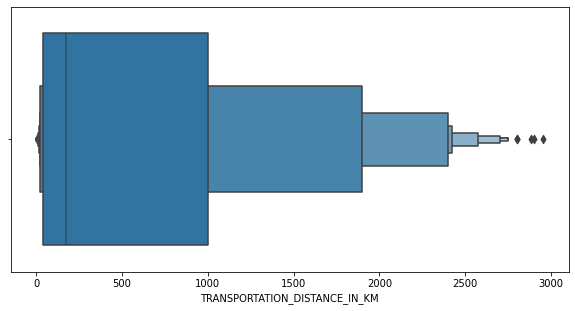

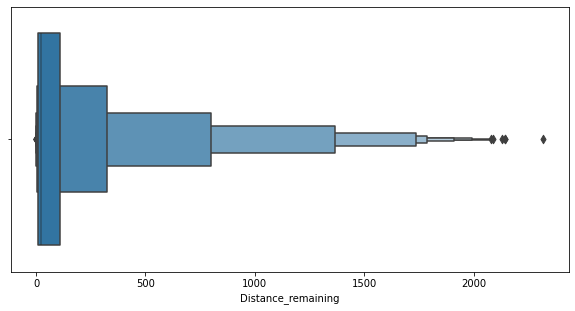

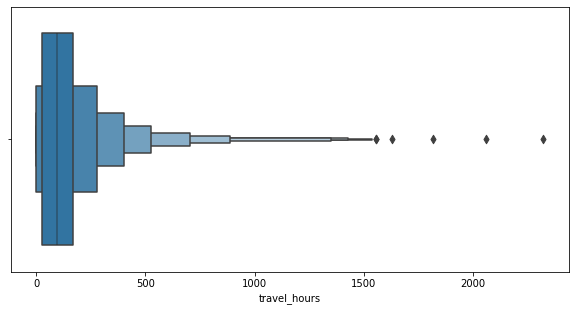

In [ ]:
for index,column in enumerate(numerical_var):
    fig=plt.figure(figsize=(10,40))
    plt.subplot(7,1,index+1)
    sns.boxenplot(data[column])
    plt.xlabel(column)

Defining a function, outliers(), for printing the outlier values of the variables.

In [ ]:
def outliers(x):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outlier_values = x[(x<min_range) | (x>max_range)]
    return outlier_values

Printing out the outlier values using the function defined above

In [ ]:
for i in numerical_var:
  outlier_values = outliers(data[i])
  print(outlier_values)

78      2543.00
91      2750.00
93      2750.00
94      2455.00
132     2750.00
         ...   
3000    2455.00
4093    2642.85
4201    2640.75
5228    2640.75
5516    2954.70
Name: TRANSPORTATION_DISTANCE_IN_KM, Length: 161, dtype: float64
42       279.151047
59      1435.765083
60       475.856926
62      1403.589917
63       475.253204
           ...     
5707     402.215113
5719     367.514037
5727     370.979915
5729     370.979915
5754     280.359165
Name: Distance_remaining, Length: 830, dtype: float64
135      408.0
1062     390.0
1192     632.0
1284     576.0
1285     549.0
         ...  
5494     473.0
5499     475.0
5544     588.0
5578     401.0
5786    2061.0
Name: travel_hours, Length: 390, dtype: float64


These outlier values need not be removed, because they just indicate the unusual large distance delivery trip occured. For instance, from Karnataka to Central Development Region, Nepal.

# **Exploratory Data Analysis**

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report",html={'style':{' full_width': True}})
profile = ProfileReport(data, title="Pandas Profiling Report",html={'style':{' full_width': True}})

This shows an overview of the dataset and all essential informations of every columns in the dataset. Moreover profiling is highly interactive like finding the correlation between the variables.

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file='Delivery Truck.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Plotting The Ontime And Delay Percentage In A Pie Chart**

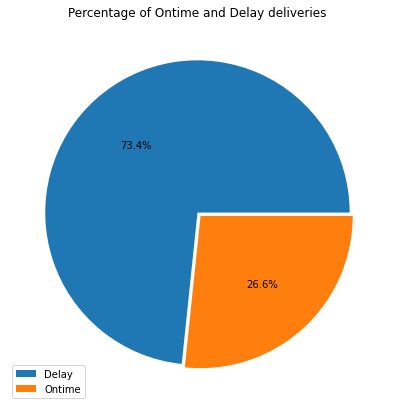

In [ ]:
plt.rcParams['figure.figsize']=(7,7)

plt.pie(data['Ontime'].value_counts(), explode = (0, 0.03), autopct='%1.1f%%')
plt.title('Percentage of Ontime and Delay deliveries')
plt.legend(['Delay', 'Ontime'])

plt.show()

Delayed deliveries are most common.
73.4% of the deliveries are delayed in this particular dataset covering almost all states of India.

**Suppliers With Most Number Of Ontime Deliveries**

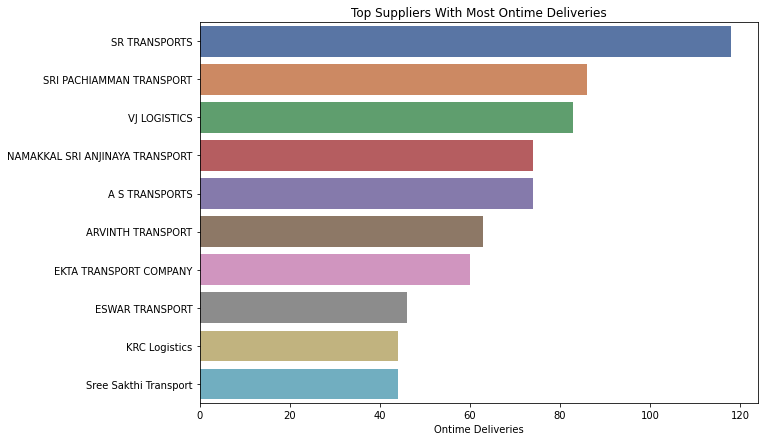

In [ ]:
plt.figure(figsize=(10,7))
top_10=(data[data['Ontime']==1]['supplierNameCode'].value_counts().head(10))
sns.barplot(x=top_10,y=top_10.index,palette='deep')
plt.title("Top Suppliers With Most Ontime Deliveries")
plt.xlabel("Ontime Deliveries") 
plt.show()

Insights:

S R Transports stands on top in the number of ontime deliveries.
Sri Pachiamman Transport, vJ Logistics, Nammakkal Sri Aninjaya Transport, AS Trnsports are the other better performing Suppliers with most no.of Ontime deliveries.

**Suppliers With Most Number Of Delay Deliveries**

Text(0.5, 0, 'Delay Deliveries')

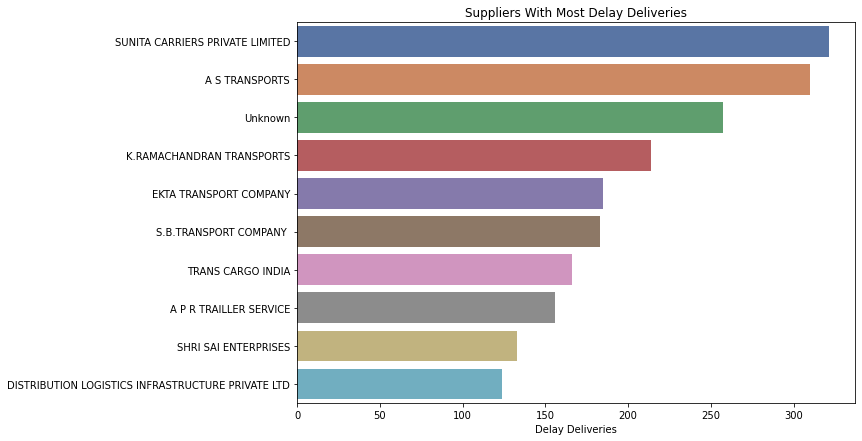

In [ ]:
plt.figure(figsize=(10,7))
top_10=(data[data['Ontime']==0]['supplierNameCode'].value_counts().head(10))
sns.barplot(x=top_10,y=top_10.index,palette='deep')
plt.title("Suppliers With Most Delay Deliveries")
plt.xlabel("Delay Deliveries")

Insights:

Sunitha Carriers Private Ltd. has the most no.of delayed deliveries.

AS Transports, K Ramachandran TRansports, Ekta Transport Company etc are the other Suppliers with most no.of Delayed deliveries.

AS Transports and Ekta Transport Company came in both the list of Suppliers with most no.of ontime deliveries as well as most no.of delayed deliveries.

**Top 10 States In IMPORTS And EXPORTS**

Text(0.5, 1.0, 'Most of the Exports')

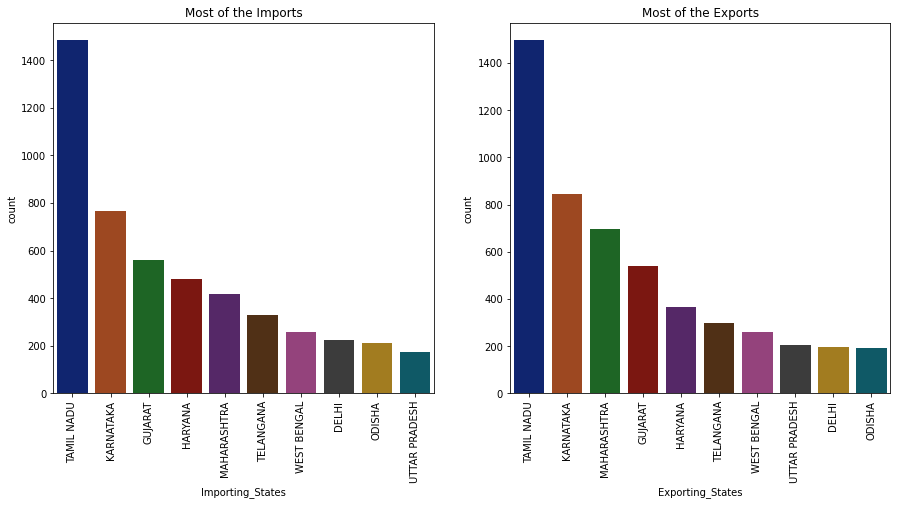

In [ ]:
plt.rcParams['figure.figsize']=15,15

plt.subplot(221)

sns.countplot(data['Importing_States'],
             order=data['Importing_States'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the Imports')

plt.subplot(222)

sns.countplot(data['Exporting_States'],
             order=data['Exporting_States'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the Exports')


Insights:

Tamil Nadu Stands on top with the most no.of Imports as well as Exports.

Uttar Pradesh is on the 10th position in the case of Imports, while on the 8th postion in case of Exports.

Odisha is on the 10th postion in case of Exports.

**Distribution plot of 'TRANSPORTATION_DISTANCE_IN_KM', 'distance_remaining', 'travel_hours'.**

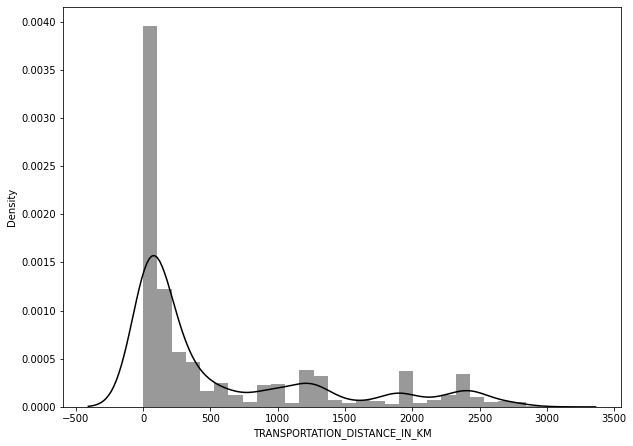

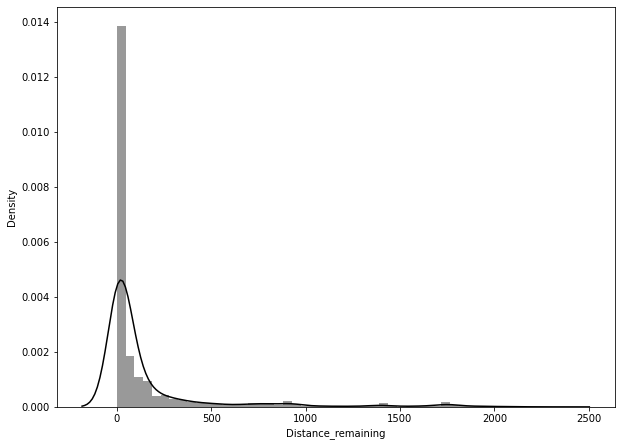

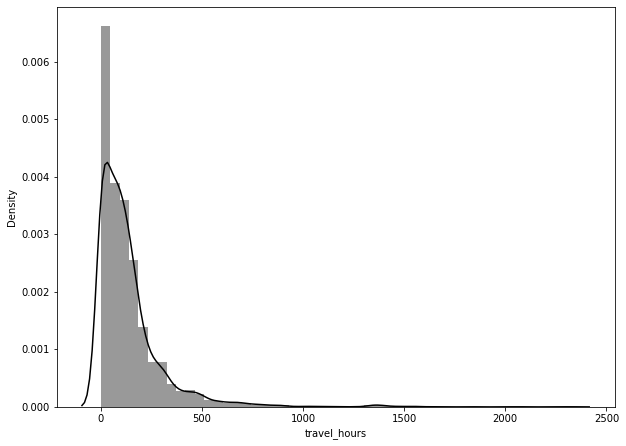

In [ ]:
for index, columns in enumerate(numerical_var):
  plt.figure(figsize=(10,25))
  plt.subplot(3,1,index+1)
  sns.distplot(data[columns], color='black')
  plt.show()

Insights:

The distribution of Transportation Distance in Km, Distance remaining, and Travel hours are left skewed.
This means most of the data points shows lesser travel distances, while there are only few instances of covering large distances, an insight that is already received through finding the outliers.

**Ontime And Delay According To EXPORTING And IMPORTING STATES**

Text(0.5, 1.0, 'Importing_States')

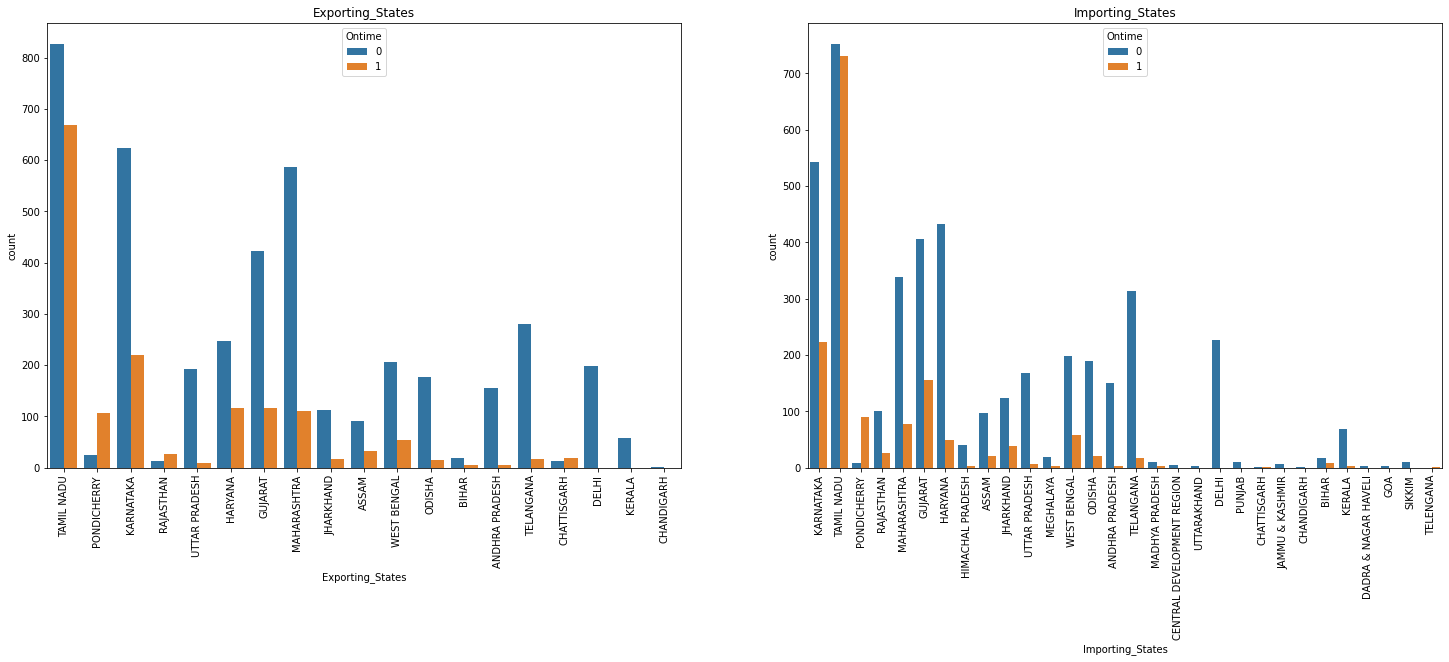

In [ ]:
plt.rcParams['figure.figsize']=25,18

plt.subplot(223)

sns.countplot(x='Exporting_States',hue='Ontime',data=data)
plt.xticks(rotation=90)

plt.title('Exporting_States')

plt.subplot(224)

sns.countplot(x='Importing_States',hue='Ontime',data=data)
plt.xticks(rotation=90)
plt.title('Importing_States')

Insights:

The largest proportion of ontime deliveries among the total deliveries occured are seen in Pondicherry, where the instances of ontime deliveries outnumber the delayed deliveries.

Tamil Nadu, Karnataka, Gujarat, Haryana are the other states having some consider number of ontime deliveries.

For Delhi and Kerala, Ontime deliveries are negligible according to this particular dataset.

Deliveries toward Delhi, Kerala, Punjab, Goa, Sikkim, J&K, etc suffers delays, with negligible instances of receiving the deliveries ontime.

**Vehicle Type With Most Successful Ontime Deliveries**

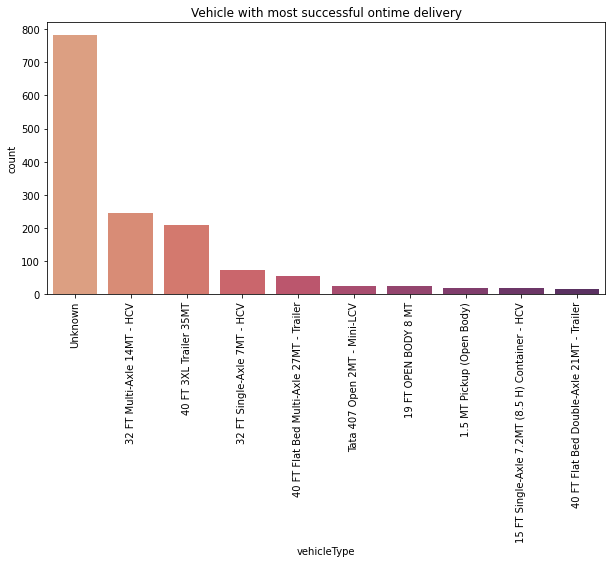

In [ ]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(data[data['Ontime']==1]['vehicleType'],
             order=data[data['Ontime']==1]['vehicleType'].value_counts().head(10).index,
             palette="flare")
plt.xticks(rotation=90)
plt.title('Vehicle with most successful ontime delivery')
plt.show()

Insights:

Most of the entries of vehicle types are 'Unknown' and so, it comes on top while considering the count.
Neglecting the above fact, '32 FT Multi-Axle 14MT - HCV' vehicle stands on top for ontime deliveries.

**Which State Registered Vehicle Has Most Successful Ontime Deliveries**

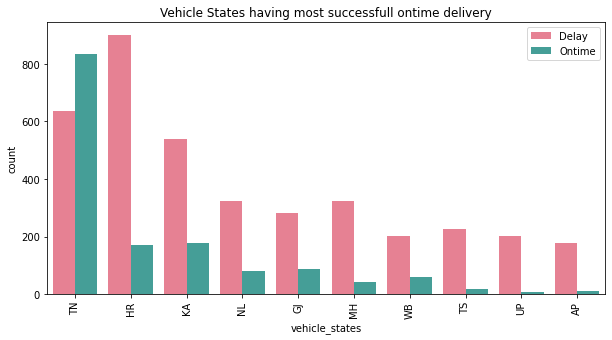

In [ ]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(data['vehicle_states'],
             order=data['vehicle_states'].value_counts().head(10).index,
              hue=data['Ontime'],
             palette='husl')
plt.xticks(rotation=90)
plt.title('Vehicle States having most successfull ontime delivery')
plt.legend(['Delay', 'Ontime'])
plt.show()

Insights:

Tamil Nadu registered vehicles shows most no.of Ontime deliveries.
There are negligible instances of using vehicles(trucks) registered in Pondicherry, Sikkim, Madhya Pradesh, Himachal Pradesh etc for delivery purpose.

**Do The Availability Of Driver Name Affect The Ontime/Delay ?**

In [ ]:
data[data['Driver_Name']=='Unknown']['Ontime'].value_counts()

0    2294
1     158
Name: Ontime, dtype: int64

**Do The Availability Of Driver Mobile Number Affect The Ontime/Delay ?**

In [ ]:
data[data['Driver_MobileNo']==0]['Ontime'].value_counts()

0    2308
1     889
Name: Ontime, dtype: int64

**Checking The Contingency To Find The Relation Between Driver_MobileNo and Ontime**

In [ ]:
contingency= pd.crosstab(data['Driver_MobileNo'], data['Ontime'])
contingency
 

Ontime              0    1
Driver_MobileNo           
0                2308  889
1                1942  655

In [ ]:
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingency)
p

0.028947760711775714

The p value obtained from chi-square test for independence is significant (p < 0.05), and therefore, we conclude that there is a significant association between treatments 

**Finding Categorical Columns Which May Help For Model Building**

In [ ]:
categorical_columns=[]

for column in data.columns:
    if(len(data[column].unique())<250):
        categorical_columns.append(column)
    else:
        continue

In [ ]:
categorical_columns

['GpsProvider',
 'Market/Regular ',
 'Origin_Location',
 'Org_lat_lon',
 'OriginLocation_Code',
 'vehicleType',
 'Driver_MobileNo',
 'customerID',
 'customerNameCode',
 'Ontime',
 'vehicle_states',
 'Exporting_States',
 'Importing_States']

In [ ]:
print('No. of unique categories in every column\n')
for i in categorical_columns:
    print(i,':',len(data[i].unique()),'\n')

No. of unique categories in every column

GpsProvider : 29 

Market/Regular  : 2 

Origin_Location : 168 

Org_lat_lon : 168 

OriginLocation_Code : 176 

vehicleType : 42 

Driver_MobileNo : 2 

customerID : 38 

customerNameCode : 38 

Ontime : 2 

vehicle_states : 27 

Exporting_States : 19 

Importing_States : 30 



**Plotting Some Using Informations From Categorical Columns**

Feature name: GpsProvider  
 unique elements of this column are ['CONSENT TRACK' 'VAMOSYS' 'KRC LOGISTICS' 'WABCOTRANS' 'EKTA' 'BEECON'
 'Garuda' 'SAILOGISTICS' 'APACE_TRANSCO' 'NUEVASTECH' 'VIRSTEMPO'
 'FORIGOTRANS' 'NIMBLE' 'BALLY LOGISTICS' 'PREM TRANSPORT' 'TransCargo'
 'BHIWADIDELHIROADLINE' 'PRATHIKSHATRANSPORT' 'MANUAL' 'TRANS CARGO INDIA'
 'DHILLONGOODS' 'Cargo Carriers' 'VINAYAKA_TVS' 'Sri Vinayaka Transport'
 'JTECH' 'FLEETX' 'SahilCargo' 'INSTANT' 'WDSL']


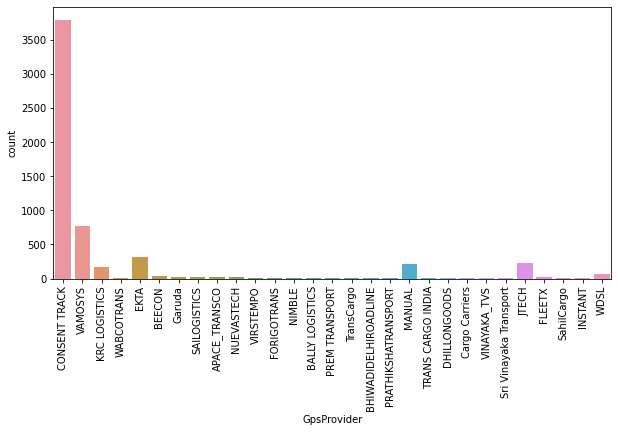





Feature name: Market/Regular   
 unique elements of this column are ['Market' 'Regular']


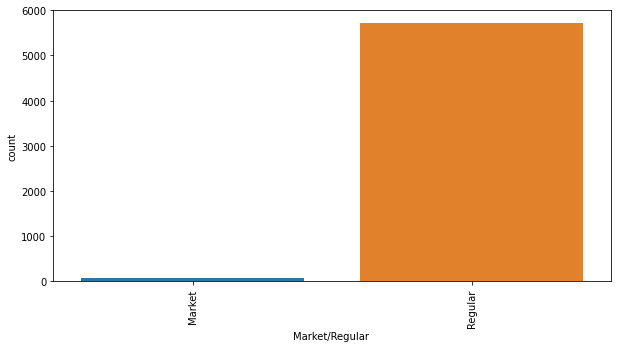





Feature name: Origin_Location  
 unique elements of this column are ['TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU'
 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU'
 'LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY'
 'ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU'
 'ASHOK LEYLAND PLANT 2-HOSUR,HOSUR,KARNATAKA'
 'LUCAS TVS LTD-AMBATTUR,CHENNAI,TAMIL NADU'
 'TRACTORS & FARM EQUIPMENT LIMITED,KANCHIPURAM,TAMIL NADU'
 'NATIONAL ENGG.IND.LTD.,JAIPUR,RAJASTHAN'
 'TVS LOGISTICS SERVICES LIMITED,LUCKNOW,UTTAR PRADESH'
 'TVSLSL-JAMALPURL-HUB,GURGAON,HARYANA' 'Jamalpur, Gurgaon, Haryana'
 'Khorajnanoda, Ahmedabad, Gujarat' 'Gopanapalli, Krishnagiri, Tamil Nadu'
 'Singaperumalkoil, Kanchipuram, Tamil Nadu'
 'Anekal, Bangalore, Karnataka' 'Vellaripatti, Madurai, Tamil Nadu'
 'Shive, Pune, Maharashtra' 'Naickenpalayam, Coimbatore, Tamil Nadu'
 'Onnalvadi, Krishnagiri, Tamil Nadu' 'Pondur, Kanchipuram, Tamil Nadu'
 'Gobindpur Housing Colony, East Singhbhum, Jharkhand'
 'Kalri, Mahesana, Gujarat' 'Gurgaon, Gu

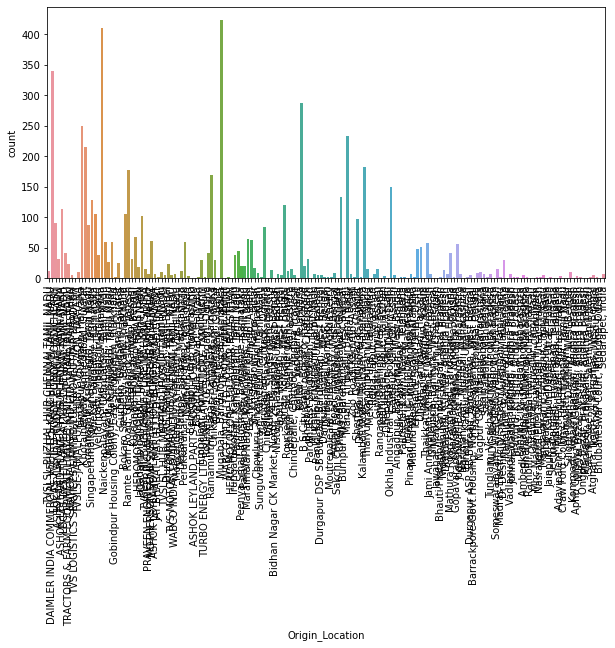





Feature name: Org_lat_lon  
 unique elements of this column are ['13.1550,80.1960' '12.8390,79.9540' '11.8710,79.7390' '11.8720,79.6320'
 '13.2150,80.3200' '12.7510,77.8040' '13.1020,80.1940' '12.7770,80.0250'
 '26.5500,75.4630' '26.8500,80.9200' '28.3730,76.8970'
 '28.373519,76.835337' '22.961777,72.094219' '12.671093,77.779537'
 '12.786517,79.975221' '12.722686,77.676518' '9.973636,78.281783'
 '18.750621,73.87719' '11.154594,76.922532' '12.683589,77.859239'
 '12.930429,79.931163' '22.749591,86.281875' '23.5159,72.077925'
 '28.430086,77.017841' '23.67348,86.129379' '28.658633,77.438643'
 '26.192290403509681,91.751276775362513'
 '26.185619636418977,91.843581932197225' '28.2070,76.8560'
 '13.087428,80.184717' '18.6270,73.7430' '22.9900,72.2500'
 '12.7200,77.8170' '22.5800,72.2200' '12.5000,79.5600' '27.9800,76.3800'
 '23.3490,72.0560' '13.165101,80.204244'
 '23.525267916088961,87.264424348570884' '12.4200,77.4800'
 '13.0600,80.0600' '12.746894,77.806168' '17.638373,74.065262'
 '28.4

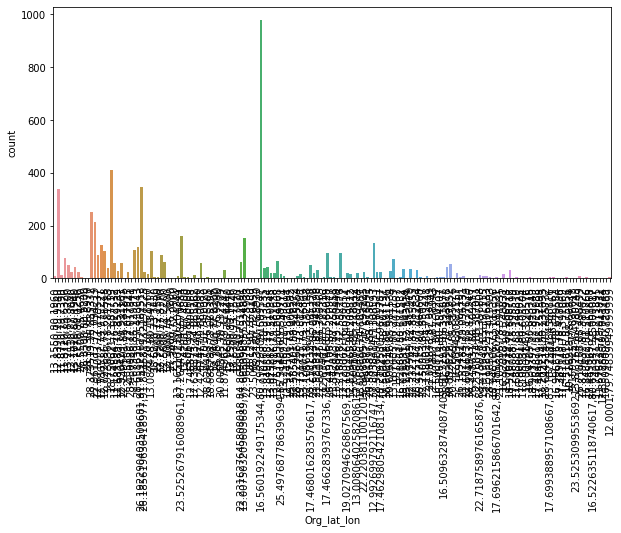





Feature name: OriginLocation_Code  
 unique elements of this column are ['CHEPUZTVSHUA1' 'CHEORADMRCCB1' 'CHEPONLUTCCA4' 'CHENETLUTCCA1'
 'CHEENNALLCCA1' 'HOSHOSALLCCA3' 'CHEPADLUTCCA1' 'CHEMMNTFECCC3'
 'GURJAINEICCA7' 'GURLUCTVSHUA9' 'GURJMATVSHUA1' 'HALSANFILCCA8'
 'HOSMADTVSHUA1' 'CHEMMNFILCCA1' 'HOSKIAOTICCA3' 'CHEMADSCTCCA2'
 'PUNBUDBILCCA3' 'COIPERTVSHUA3' 'HOSHARTMCCCA1' 'PUNTATTVSHUA1'
 'PUNMAHERCCCB2' 'PUNMUMERCCCK9' 'CHEMMNFILWHE3' 'JAMJAMTVSHUA1'
 'HALHANTVSHUA2' 'GURMANJBLCCG3' 'HALSANVLECCB5' 'V0051675 ' 'V0045769 '
 'V0045300 ' 'V0052341 ' 'GURRIIHHMCCA1' 'CHEPADBILCCA4' 'HOSSIPPVECCA8'
 'HALSANMSSCCB7' 'HOSHOSALLCCA2' 'HALVITJBLCCA1' 600066 'V0045772 '
 'CHEAMBWABCCA1' 'HOSLALWABWHA2' 'PUNSATSPICCA1' 'CHEPOLBILCCA1'
 'GURNEENDCCCB4' 'PUNMAVJILCCA2' 'HOSCHAALLCCA2' 'GURBAWWCWCCD4'
 'CHEMMNMATCCD4' 'CHEPULTELCCA1' 'V0045851 ' 'V0045771 ' 'HALKALGTICCA2'
 'V0045852 ' 'PUNCHAESICCC6' 'V0048673 ' 'GURNEEHHMWHB1' 'CHEMEVWENCCA4'
 'CHEORAKOVWHG9' 'HOSPEEWENCCI1' 'CHEMELNMKC

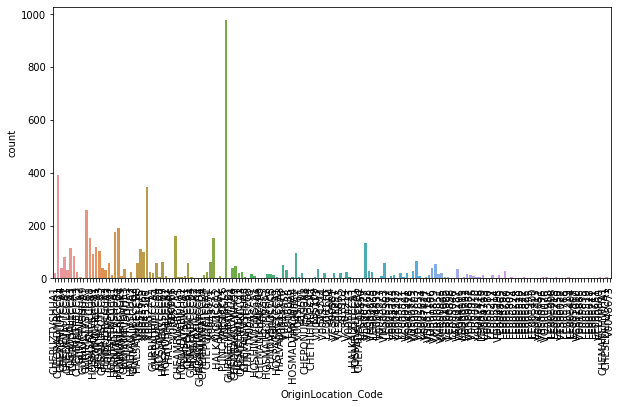





Feature name: vehicleType  
 unique elements of this column are ['Unknown' '32 FT Single-Axle 7MT - HCV' '32 FT Multi-Axle 14MT - HCV'
 '1 MT Tata Ace (Open Body)' '24 FT SXL Container'
 '32 FT Multi-Axle MXL 18MT' '19 FT OPEN BODY 8 MT' '17 FT Container'
 '20 FT SXL Container' '1 MT Tata Ace (Closed Body)'
 '19 FT Open 7MT - MCV' '1.5 MT Pickup (Open Body)'
 '22 FT Taurus Open 16MT - HCV' '40 FT 3XL Trailer 35MT'
 '40 FT Flat Bed Multi-Axle 27MT - Trailer' '20 FT CLOSE 7MT-MCV '
 '14 FT Open - 3 MT' '1.5 MT Vehicle (Closed Body)'
 '24 / 26 FT Taurus Open 21MT - HCV' '32 FT Closed Container 15 MT'
 '20 FT Open 9MT - MCV' '40 FT Flat Bed Double-Axle 21MT - Trailer'
 '19 FT SXL Container' '17 FT Open 5MT - MCV' '22 FT Closed Container'
 'Mahindra LCV 1MT' '22 FT Open Body 16MT' '25 FT Open Body 21MT'
 '30 FT Open SXL 30MT' '26 FT Taurus Open 27MT - HCV'
 'Tata 407 Open 2MT - Mini-LCV'
 '15 FT Single-Axle 7.2MT (8.5 H) Container - HCV'
 '20 FT Closed  Container 8MT' 'Tata 407 / 14 FT 

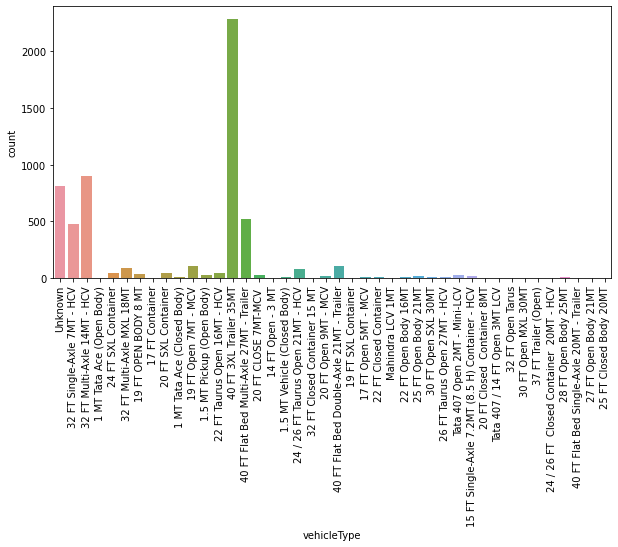





Feature name: Driver_MobileNo  
 unique elements of this column are [0 1]


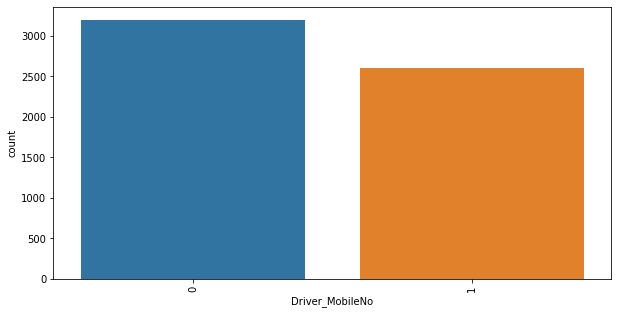





Feature name: customerID  
 unique elements of this column are ['ALLEXCHE45' 'DMREXCHEUX' 'LUTGCCHE06' 'TFEEXCHETB' 'NEIEXGURBI'
 'CMHEXPUNMB' 'JBLEXGURT6' 'JKMEXGURFA' 'FILEXCHE19' 'OTIEXHOSJM'
 'SCTGCMAD13' 'BILGCCHE02' 'TMCGCCHE05' 'ERCEXPUNTG' 'SVDEXHOS48'
 'LTLEXMUM40' 'HHMEXGURO6' 'PVEEXHOS12' 'MSSEXGURY1' 'WABGCCHE17'
 'SPIEXPUNJ4' 'VLEEXMADHC' 'GTIEXHAL80' 'FLYEXHOSH3' 'TELGCCHE03'
 'GTKEXGURJS' 'HCGEXGURBL' 'RIIEXGURS8' 'TALEXGURQ6' 'SRIEXCHE05'
 'WENEXBAN18' 'CSYEXCHEM2' 'KOVEXTNUD4' 'AVCEXCHEIP' 'JMAEXPUNJY'
 'KUAEXMAD0L' 'JIDEXPUNTB' 'RCKEXGURBP']


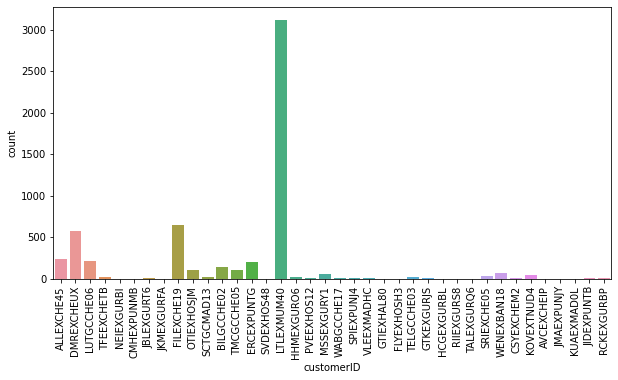





Feature name: customerNameCode  
 unique elements of this column are ['Ashok leyland limited' 'Daimler india commercial vehicles pvt lt'
 'Lucas tvs ltd' 'Tractors & farm equipment limited'
 'National engg.ind.ltd.' 'Cummins technologies india pvt ltd'
 'Jay bharat maruti limited' 'Jbm kanemitsu pulleys pvt ltd'
 'Ford india private limited' 'Otis elevator company (india) ltd'
 'Tvs srichakra limited' 'Brakes india private ltd'
 'Tvs motor company limited' 'Ericsson india private limited'
 'Continental automotive components india' 'Larsen & toubro limited'
 'Hero motocorp ltd' 'Praveen engineering products india pvt l'
 'Motherson sumi system ltd' 'Wabco india ltd' 'Spicer india private ltd'
 'Valeo india private ltd' 'Getrag transmissions india pvt ltd'
 'Flyjac logistics pvt ltd' 'Turbo energy pvt ltd' 'G-tekt india pvt ltd.'
 'Hi-tech gears ltd' 'Rico auto industries ltd'
 'Talbros automotive components ltd' 'Wipro enterprises pvt ltd'
 'Comstar automotive technologies pvt ltd'


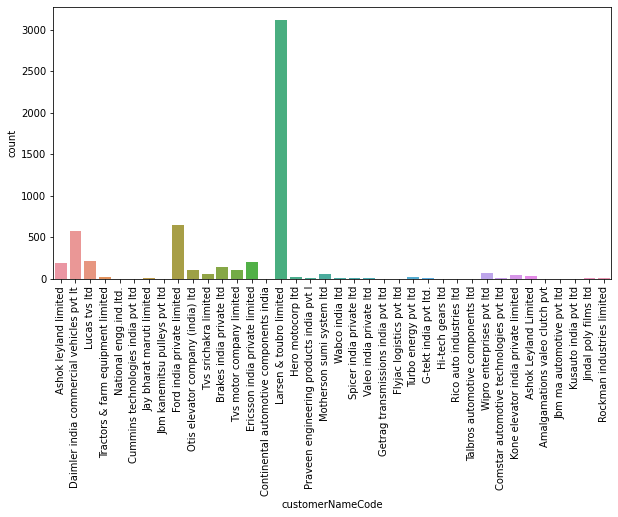





Feature name: Ontime  
 unique elements of this column are [0 1]


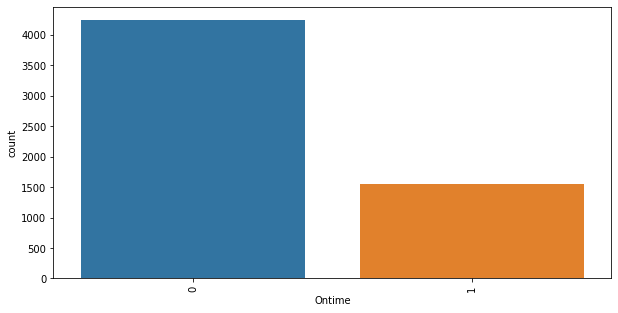





Feature name: vehicle_states  
 unique elements of this column are ['KA' 'TN' 'HR' 'PY' 'NL' 'MH' 'UP' 'PB' 'GJ' 'RJ' 'WB' 'UK' 'JH' 'AP'
 'BR' 'OR' 'OD' 'MP' 'DN' 'CG' 'TS' 'DL' 'HP' 'AS' 'KL' 'WG' 'SK']


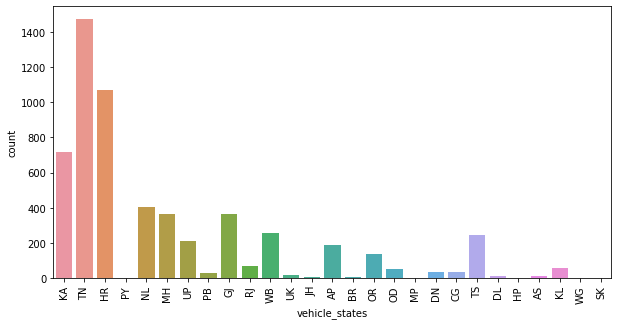





Feature name: Exporting_States  
 unique elements of this column are ['TAMIL NADU' 'PONDICHERRY' 'KARNATAKA' 'RAJASTHAN' 'UTTAR PRADESH'
 'HARYANA' 'GUJARAT' 'MAHARASHTRA' 'JHARKHAND' 'ASSAM' 'WEST BENGAL'
 'ODISHA' 'BIHAR' 'ANDHRA PRADESH' 'TELANGANA' 'CHATTISGARH' 'DELHI'
 'KERALA' 'CHANDIGARH']


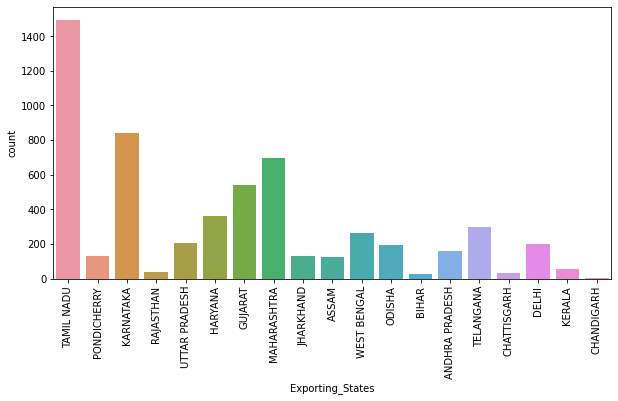





Feature name: Importing_States  
 unique elements of this column are ['KARNATAKA' 'TAMIL NADU' 'PONDICHERRY' 'RAJASTHAN' 'MAHARASHTRA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'ASSAM' 'JHARKHAND'
 'UTTAR PRADESH' 'MEGHALAYA' 'WEST BENGAL' 'ODISHA' 'ANDHRA PRADESH'
 'TELANGANA' 'MADHYA PRADESH' 'CENTRAL DEVELOPMENT REGION' 'UTTARAKHAND'
 'DELHI' 'PUNJAB' 'CHATTISGARH' 'JAMMU & KASHMIR' 'CHANDIGARH' 'BIHAR'
 'KERALA' 'DADRA & NAGAR HAVELI' 'GOA' 'SIKKIM' 'TELENGANA']


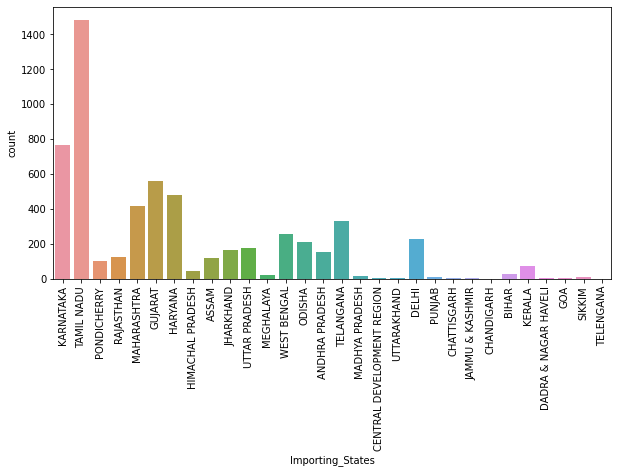

In [ ]:

warnings.filterwarnings('ignore')

for i  in categorical_columns:
        print('Feature name:',i,' \n unique elements of this column are',data[i].unique())
        sns.countplot(data[i])
        plt.xlabel(i)
        plt.xticks(rotation=90)
        plt.ylabel('count')
        plt.show()
        print('\n\n\n')

Insights:

In the count plot of GPS Provider, 'Consent Track' is the frequently used GPS Provider, among the 29 unique catagories.

In the count plot of Market/Regular, 'Regular' is the most occuring entry, comprising about 98%.

In the count plot of Ontime, 'delay' is the most occuring one, comprising about 73%

In the count plot of CustomerID, 'LTLEXMUM40' is the most occuring custumerID, which corresponds to Larsen & toubro limited.

In the count plot of VehicleStates, Tamil Nadu registered vehicles are most frequent. Then comes Haryana and Karnataka.
In the count plot of Exporting States, Tamil Nadu holds the most no.of Exports.

In the count plot of Importing States, Tamil Nadu again holds the most no.of Imports.

**Selecting The Features For Model Building**

In [ ]:
data_feature = data[[ 'Market/Regular ','OriginLocation_Code', 'DestinationLocation_Code', 'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 
                     'Driver_MobileNo', 'customerNameCode', 'supplierNameCode', 'Material Shipped', 'travel_hours', 'vehicle_states',
                     'Exporting_States', 'Importing_States', 'Distance_remaining','Ontime']]

In [ ]:
data_feature

Market/Regular  OriginLocation_Code DestinationLocation_Code  \
0             Market       CHEPUZTVSHUA1            HOSHOSALLCCA2   
1            Regular       CHEORADMRCCB1            CHEMATDMROPA7   
2            Regular       CHEPONLUTCCA4            CHEPONLUTCCA4   
3            Regular       CHEORADMRCCB1            CHEMATDMROPA7   
4            Regular       CHENETLUTCCA1            CHENETLUTCCA1   
...              ...                 ...                      ...   
5789         Regular           V0048673                  LE005770   
5790         Regular           V0045771                  LE005419   
5791         Regular           V0048673                  LE005848   
5792         Regular           V0048673                  LEL04580   
5793         Regular           V0048673                  LE005770   

      TRANSPORTATION_DISTANCE_IN_KM             vehicleType  Driver_MobileNo  \
0                             320.0                 Unknown                0   
1                             103.0                 Unknown                0   
2                             300.0                 Unknown                0   
3                              61.0                 Unknown                0   
4                             240.0                 Unknown                0   
...                             ...                     ...              ...   
5789                           40.0  40 FT 3XL Trailer 35MT                0   
5790                           31.0  40 FT 3XL Trailer 35MT                0   
5791                           49.0  40 FT 3XL Trailer 35MT                0   
5792                           49.0  40 FT 3XL Trailer 35MT                0   
5793                           49.0  40 FT 3XL Trailer 35MT                0   

                              customerNameCode   supplierNameCode  \
0                        Ashok leyland limited    VIJAY TRANSPORT   
1     Daimler india commercial vehicles pvt lt       VJ LOGISTICS   
2                                Lucas tvs ltd     G.S. TRANSPORT   
3     Daimler india commercial vehicles pvt lt  ARVINTH TRANSPORT   
4                                Lucas tvs ltd      SR TRANSPORTS   
...                                        ...                ...   
5789                   Larsen & toubro limited     A S TRANSPORTS   
5790                   Larsen & toubro limited     A S TRANSPORTS   
5791                   Larsen & toubro limited     A S TRANSPORTS   
5792                   Larsen & toubro limited     A S TRANSPORTS   
5793                   Larsen & toubro limited     A S TRANSPORTS   

              Material Shipped  travel_hours vehicle_states Exporting_States  \
0        BRACKET / GRAB HANDLE         263.0             KA       TAMIL NADU   
1        ZB MODEL PLATE / 3143          20.0             TN       TAMIL NADU   
2             LETTERING / FUSO          22.0             TN      PONDICHERRY   
3     LU STRUT RA / RADIUS ROD          12.0             TN       TAMIL NADU   
4         WISHBONE / V ROD/HDT          13.0             TN      PONDICHERRY   
...                        ...           ...            ...              ...   
5789               HORN NP.027           3.0             KA        KARNATAKA   
5790        CONTROL LEVER ASSY           2.0             KA        KARNATAKA   
5791    SPARE PARTS AUTOMOBILE           4.0             KA        KARNATAKA   
5792    SPARE PARTS AUTOMOBILE           1.0             KA        KARNATAKA   
5793    SPARE PARTS AUTOMOBILE           3.0             KA        KARNATAKA   

     Importing_States  Distance_remaining  Ontime  
0           KARNATAKA           90.530931       0  
1          TAMIL NADU            0.252465       1  
2         PONDICHERRY          143.213162       1  
3          TAMIL NADU            0.452778       1  
4         PONDICHERRY           65.385608       1  
...               ...                 ...     ...  
5789        KARNATAKA           19.332810       1  
5790     

Encoding the feature variables using cat.codes

In [ ]:
for column  in data_feature.columns:
  if(data_feature[column].dtype =='object'):
      data_feature[column]=data_feature[column].astype("category").cat.codes

In [ ]:
data_feature

Market/Regular   OriginLocation_Code  DestinationLocation_Code  \
0                   0                   29                       124   
1                   1                   20                        15   
2                   1                   26                        29   
3                   1                   20                        15   
4                   1                   19                        21   
...               ...                  ...                       ...   
5789                1                  143                       272   
5790                1                  127                       221   
5791                1                  143                       291   
5792                1                  143                       405   
5793                1                  143                       272   

      TRANSPORTATION_DISTANCE_IN_KM  vehicleType  Driver_MobileNo  \
0                             320.0           41                0   
1                             103.0           41                0   
2                             300.0           41                0   
3                              61.0           41                0   
4                             240.0           41                0   
...                             ...          ...              ...   
5789                           40.0           34                0   
5790                           31.0           34                0   
5791                           49.0           34                0   
5792                           49.0           34                0   
5793                           49.0           34                0   

      customerNameCode  supplierNameCode  Material Shipped  travel_hours  \
0                    2               243               138         263.0   
1                    7               251              1154          20.0   
2                   22                67               541          22.0   
3                    7                20               643          12.0   
4                   22               185              1096          13.0   
...                ...               ...               ...           ...   
5789                21                 3               463           3.0   
5790                21                 3               237           2.0   
5791                21                 3               946           4.0   
5792                21                 3               946           1.0   
5793                21                 3               946           3.0   

      vehicle_states  Exporting_States  Importing_States  Distance_remaining  \
0                 10                15                14           90.530931   
1                 21                15                24            0.252465   
2                 21                13                20          143.213162   
3                 21                15                24            0.452778   
4                 21                13                20           65.385608   
...              ...               ...               ...                 ...   
5789              10                 9                14           19.332810   
5790              10                 9                14           19.038737   
5791              10                 9                14           33.790182   
5792              10                 9                14           14.182350   
5793              10                 9                14           25.483789   

      Ontime  
0          0  
1          1  
2          1  
3          1  
4          1  
...      ...  
5789       1  
5790       1  
5791       1  
5792       0  
5793       1  

[5794 rows x 15 columns]

**Splitting The Dataset For Testing And Training**

In [ ]:

x=data_feature.drop(columns='Ontime', axis=1)
y = data_feature['Ontime']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)
x_train.shape, y_train.shape

((4345, 14), (4345,))

**DecisionTreeClassifier**

In [ ]:

tree_cl = DecisionTreeClassifier()
tree_cl.fit(x_train,y_train)
y_predict = tree_cl.predict(x_test)

f1_score(y_test,y_predict)

0.8419782870928829

**RandomForestClassifier**

In [ ]:

rf_cl = RandomForestClassifier()
rf_cl.fit(x_train,y_train)
y_pred = rf_cl.predict(x_test)

f1_score(y_test,y_pred)

0.9012345679012346

**XG Boost Classifier**

In [ ]:

xgb_cl = XGBClassifier()
xgb_cl.fit(x_train, y_train)
y_predict = xgb_cl.predict(x_test)

r2_score(y_test,y_predict)

0.6314009661835749

**GradientBoostingClassifier**

In [ ]:

gb_cl = GradientBoostingClassifier()
gb_cl.fit(x_train, y_train)
y_predict = gb_cl.predict(x_test)

f1_score(y_test,y_predict)

0.8611111111111112

**Logistic Regression**

In [ ]:

logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)

f1_score(y_test, y_pred)

0.7527472527472528

**Extra Trees Classifier**

In [ ]:

ex_tree_cl = ExtraTreesClassifier()
ex_tree_cl.fit(x_train,y_train)
y_predict = ex_tree_cl.predict(x_test)

f1_score(y_test,y_predict)

0.8913857677902621

In [ ]:
df = pd.DataFrame({
    'Model' : ['Extra Tree Classifier',  'Decision Tree Classifier',
              'Random Forest Classifier','XGB Classifier', 'Gradient Boosting Classifier', 'Logistic Regression'],
    'Score' : [ex_tree_cl.score(x_test, y_test), tree_cl.score(x_test, y_test),
              rf_cl.score(x_test, y_test),  xgb_cl.score(x_test, y_test),
              gb_cl.score(x_test, y_test), logit.score(x_test, y_test)]
})

df.sort_values(by = 'Score', ascending=False)

Model     Score
2      Random Forest Classifier  0.944790
0         Extra Tree Classifier  0.939959
3                XGB Classifier  0.924776
4  Gradient Boosting Classifier  0.924086
1      Decision Tree Classifier  0.909593
5           Logistic Regression  0.875776

**Feature Importance Of The Model With Best Score**

In [ ]:
importances=pd.Series(rf_cl.feature_importances_, index = x.columns).sort_values(ascending=False)*100
importances

travel_hours                     29.844644
vehicleType                      16.670956
Distance_remaining                9.757920
DestinationLocation_Code          7.699112
TRANSPORTATION_DISTANCE_IN_KM     7.117963
OriginLocation_Code               6.302003
Material Shipped                  4.410226
customerNameCode                  4.105928
Driver_MobileNo                   3.897356
supplierNameCode                  3.351286
vehicle_states                    2.723911
Exporting_States                  2.045187
Importing_States                  1.919325
Market/Regular                    0.154183
dtype: float64

#Hyper parameter Tuning

**Defining The Parameters and Their Range**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_features = ['auto', 'sqrt', 'log2']

max_depth = range(10,40,5)

min_samples_split = [2,4,6,8]

min_samples_leaf = [1,2,0.1,0.001,4,3,5,6,7,8]

bootstrap = [True, False]

criterion = ['gini', 'entropy']

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion}
print(param_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': range(10, 40, 5), 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 0.1, 0.001, 4, 3, 5, 6, 7, 8], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [ ]:
rf_Model = RandomForestClassifier()

**Ramdomized Search CV**

In [ ]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 40, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 0.1, 0.001,
                                                             4, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   verbose=2)

**Best Parameters**

In [ ]:
rf_RandomGrid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 266}

**Fitting The Model With Best Parameters**

In [ ]:

rfc_cv=RandomForestClassifier(bootstrap= True,max_depth=25,max_features= 'sqrt',min_samples_leaf= 1,
                              min_samples_split=2,n_estimators= 266, criterion='entropy')

rfc_cv.fit(x_train,y_train)
y_pred = rfc_cv.predict(x_test)

r2_score(y_test,y_pred)

0.7227053140096619

In [ ]:
rfc_cv.score(x_test,y_test)

0.9434092477570738